# Muhammad Ghulamzaki

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 87717837.68it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 66230559.77it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23445686.57it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12370473.23it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



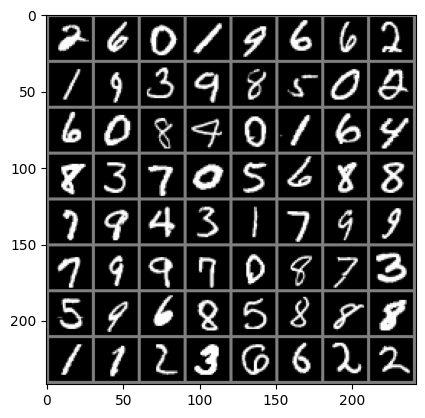

Labels: tensor([2, 6, 0, 1, 9, 6, 6, 2, 1, 9, 3, 9, 8, 5, 0, 2, 6, 0, 8, 4, 0, 1, 6, 4,
        8, 3, 7, 0, 5, 6, 8, 8, 7, 9, 4, 3, 1, 7, 9, 9, 7, 9, 9, 7, 0, 8, 7, 3,
        5, 9, 6, 8, 5, 8, 8, 8, 1, 1, 2, 3, 6, 6, 2, 2])


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)

#1. Compare 3 different configurations while the model is wider/deeper

Konfigurasi 1

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

model = SimpleNN()


In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training Finished')


Epoch [1/10], Loss: 1.5289
Epoch [2/10], Loss: 1.5276
Epoch [3/10], Loss: 1.4877
Epoch [4/10], Loss: 1.5505
Epoch [5/10], Loss: 1.4949
Epoch [6/10], Loss: 1.5454
Epoch [7/10], Loss: 1.5575
Epoch [8/10], Loss: 1.4838
Epoch [9/10], Loss: 1.4995
Epoch [10/10], Loss: 1.4618
Training Finished


In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
confusion = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:\n', confusion)


Accuracy: 0.9630
F1 Score: 0.9630
Precision: 0.9633
Recall: 0.9630
Confusion Matrix:
 [[ 961    0    2    1    0    3   10    1    2    0]
 [   0 1128    3    1    0    1    1    0    1    0]
 [   5    4 1000    4    2    1    4    6    5    1]
 [   1    7   15  963    0    8    0    5    7    4]
 [   2    2    8    0  943    1    5    1    4   16]
 [   4    1    2    7    1  863    7    1    3    3]
 [   6    4    7    0    1   10  927    0    3    0]
 [   2   18   25    2    0    1    1  969    4    6]
 [   4    4    7    4    2    8    5    3  936    1]
 [   5   10    3   10   11    7    2    5   16  940]]


Konfigurasi 2

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) #mengubah jumlah unit di layer pertama
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

model2 = SimpleNN()

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model2.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training Finished')


Epoch [1/10], Loss: 1.4959
Epoch [2/10], Loss: 1.4626
Epoch [3/10], Loss: 1.5102
Epoch [4/10], Loss: 1.4631
Epoch [5/10], Loss: 1.5468
Epoch [6/10], Loss: 1.4615
Epoch [7/10], Loss: 1.4977
Epoch [8/10], Loss: 1.5177
Epoch [9/10], Loss: 1.4633
Epoch [10/10], Loss: 1.4612
Training Finished


In [ ]:
model2.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model2(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
confusion = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:\n', confusion)


Accuracy: 0.9689
F1 Score: 0.9688
Precision: 0.9692
Recall: 0.9689
Confusion Matrix:
 [[ 963    0    3    0    0    4    7    1    2    0]
 [   0 1109    3    5    1    0    9    2    6    0]
 [   4    1 1008    2    2    0    3    4    8    0]
 [   0    0   14  972    1    9    1    6    7    0]
 [   1    0    5    0  968    1    4    0    1    2]
 [   3    1    0    7    1  864    7    1    6    2]
 [   7    1    0    1    2    1  943    0    3    0]
 [   1    7   17    1    4    0    0  992    1    5]
 [   4    0    4    3    3    3    7    2  946    2]
 [   4    2    1    4   38   16    1    8   11  924]]


Konfigurasi 3

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64) #mengubah jumlah unit di layer pertama
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

model3 = SimpleNN()

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model3.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model3(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training Finished')


Epoch [1/10], Loss: 1.6369
Epoch [2/10], Loss: 1.6893
Epoch [3/10], Loss: 1.5015
Epoch [4/10], Loss: 1.5314
Epoch [5/10], Loss: 1.5140
Epoch [6/10], Loss: 1.5049
Epoch [7/10], Loss: 1.4633
Epoch [8/10], Loss: 1.4619
Epoch [9/10], Loss: 1.4629
Epoch [10/10], Loss: 1.4869
Training Finished


In [ ]:
model3.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model3(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
confusion = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:\n', confusion)


Accuracy: 0.9541
F1 Score: 0.9541
Precision: 0.9547
Recall: 0.9541
Confusion Matrix:
 [[ 970    0    3    1    1    1    2    1    1    0]
 [   0 1120    8    0    0    1    3    1    2    0]
 [   7    1 1002    1    9    1    4    4    2    1]
 [   0    2   22  960    0   11    1    7    3    4]
 [   2    1    4    0  931    3   14    1    1   25]
 [  10    0    2   16    2  837   13    1    6    5]
 [  14    3    6    0    1    4  928    0    2    0]
 [   5    6   39    4    3    0    1  955    2   13]
 [   5    5   20   13    8    9   12    8  892    2]
 [   8    7    2   16   11    8    2    6    3  946]]


Hasil dan Kesimpulan

Dari ketiga konfigurasi yang telah diuji dengan memodifikasi jumlah unit dalam layer pertama, diperoleh hasil sebagai berikut:

### Konfigurasi 1 (128 Unit):
- **Akurasi:** 96.30%
- **F1 Score:** 96.30%
- **Precision:** 96.33%
- **Recall:** 96.30%

### Konfigurasi 2 (256 Unit):
- **Akurasi:** 96.89%
- **F1 Score:** 96.88%
- **Precision:** 96.92%
- **Recall:** 96.89%

### Konfigurasi 3 (64 Unit):
- **Akurasi:** 95.41%
- **F1 Score:** 95.41%
- **Precision:** 95.47%
- **Recall:** 95.41%

**Kesimpulan:**
- Model dengan 256 unit pada layer pertama memberikan hasil akurasi tertinggi, yaitu 96.89%, dibandingkan dengan 128 unit (96.30%) dan 64 unit (95.41%).
- Semakin banyak unit dalam layer pertama, akurasi model meningkat. Namun, peningkatan ini tidak linier dan kompleksitas model juga meningkat.
- Meskipun model dengan 256 unit memberikan akurasi yang lebih tinggi, model ini juga membutuhkan lebih banyak sumber daya komputasi. Oleh karena itu, perlu mempertimbangkan keseimbangan antara kinerja dan kebutuhan komputasi saat memilih konfigurasi model.